In [2]:
%pip install qiskit[visualization]

%pip install qiskit_aer

%pip install qiskit_ibm_runtime

%pip install matplotlib

%pip install pylatexenc

%pip install qiskit-transpiler-service

%pip install git+https://github.com/qiskit-community/Quantum-Challenge-Grader.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 1.2 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 12.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 23.5 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 79.8 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 6.0 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=c86f5eb03466891edd219e19555d70e4aecc7844c5513aafca053b8f8ee85a86
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 71.9 MB/s eta 0:00:00:00:010:01
N

In [15]:
# imports

import numpy as np
import math

from typing import List, Callable

from scipy.optimize import minimize

from scipy.optimize._optimize import OptimizeResult

import matplotlib.pyplot as plt



from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile

from qiskit.quantum_info import Statevector, Operator, SparsePauliOp

from qiskit.primitives import StatevectorSampler, PrimitiveJob

from qiskit.circuit.library import TwoLocal

from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

from qiskit.visualization import plot_histogram

from qiskit_ibm_runtime.fake_provider import FakeSherbrooke

from qiskit_ibm_runtime import Session, EstimatorV2 as Estimator

from qiskit_aer import AerSimulator, Aer
from qiskit.primitives import BackendSampler

## Segunda etapa

Generated quantum random number with 24 possibilities: 9


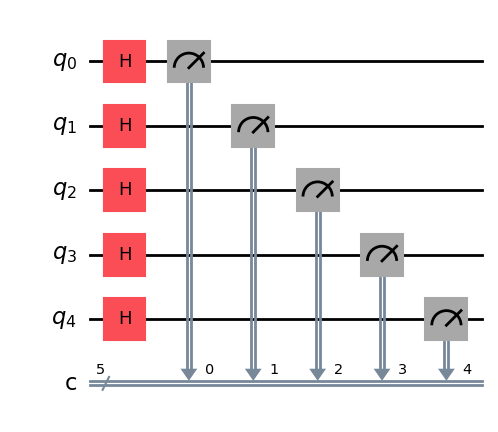

In [65]:
def quantum_random_number_with_n_possibilities(n):
    """
    Genera un número aleatorio entre 0 y n-1 utilizando un sistema cuántico.
    
    :param n: Número de posibles resultados (n resultados aleatorios).
    :return: Un número aleatorio en el rango [0, n-1].
    """
    # Calcular el número de qubits necesarios (k qubits donde 2^k >= n)
    k = math.ceil(math.log2(n))
    
    # Crear un circuito cuántico con 'k' qubits y 'k' bits clásicos
    qc = QuantumCircuit(k, k)
    
    # Aplicar la puerta Hadamard a cada qubit para ponerlos en superposición
    for qubit in range(k):
        qc.h(qubit)
    
    # Medir los qubits y almacenar el resultado en los bits clásicos
    qc.measure(range(k), range(k))
    
    # Usar el simulador de estado Aer para ejecutar el circuito
    simulator = FakeSherbrooke()#Aer.get_backend('qasm_simulator')
    
    # Ejecutar el circuito
    new_circuit = transpile(qc, simulator)
    job = simulator.run(new_circuit)
    # Obtener los resultados
    result = job.result()
    counts = result.get_counts(qc)
    
    # Extraer el resultado binario medido
    measured_bits = list(counts.keys())[0]
    
    # Convertir el resultado binario a un número entero
    random_number = int(measured_bits, 2)
    
    # Si el número generado es mayor o igual a 'n', generar otro (recursivo)
    if random_number == n:
        return quantum_random_number_with_n_possibilities(n)
    
    return random_number, qc

# Número de posibles resultados (n)
n = 24

# Generar un número aleatorio con n posibilidades
random_number,qc = quantum_random_number_with_n_possibilities(n)
print(f"Generated quantum random number with {n} possibilities: {random_number}")
qc.draw('mpl')

Generated quantum random number with 24 possibilities: 15
Generated quantum random number with 24 possibilities: 10
Generated quantum random number with 24 possibilities: 29
Generated quantum random number with 24 possibilities: 22
Generated quantum random number with 24 possibilities: 13
Generated quantum random number with 24 possibilities: 9
Generated quantum random number with 24 possibilities: 10
Generated quantum random number with 24 possibilities: 2
Generated quantum random number with 24 possibilities: 11
Generated quantum random number with 24 possibilities: 17


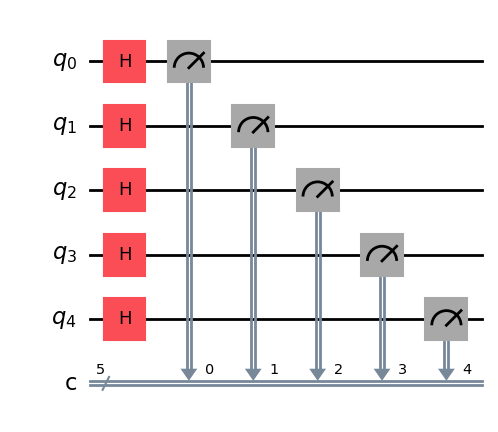

In [66]:
for i in range(0,10):
    random_number, qc = quantum_random_number_with_n_possibilities(n)
    print(f"Generated quantum random number with {n} possibilities: {random_number}")

qc.draw('mpl')